# Temat testów

Czy istnieje istotna statystycznie różnica w ocenie trudności zadania dla:
- kobiet/mężczyzn 
- danego roku urodzenia
- danego roku studiów
- danego kierunku studiów
- danej specjalności
- wady wzroku / braku wady
- osób piszących maturę z przedmiotu X / osób nie piszących
- dominującego typu uczenia poznawczego
- ilości snu
- poziomu samopoczucia
- poziomu stresu
- poziomu zmęczenia
- umiejętności czytania map
- podzielności uwagi
- umiejętności analitycznego myślenia
- poziomu spostrzegawczości
- umiejętności czytania ze zrozumieniem
- odpowiedzi na pytanie 1 przed badaniem (preferencja A vs B)
- odpowiedzi na pytanie 1 po badaniu (preferencja A vs B)
- odpowiedzi na pytanie 2 przed badaniem (preferencja mapa, tabela, tekst, wykres)
- odpowiedzi na pytanie 2 po badaniu (preferencja mapa, tabela, tekst, wykres)
- osób które zmieniły zdanie w pytaniu 1 / osób, które nie zmieniły
- osób które zmieniły zdanie w pytaniu 2 / osób, które nie zmieniły

między grupami A vs B?


In [1]:
import pandas as pd
from functions.tests.dependent_groups.two_groups import wilcoxon_test
from functions.others import choose_dominant_kind, replace_to_categories
from functions.set_preparations import prepare_row
from functions.plots import plot_two_boxplots

In [2]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv', index_col='ID', usecols=['ID', '1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud', 'SumTrud_a', 'SumTrud_b'])

df_survey = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
).fillna('NO_VAL')

df_survey = df_survey[df_survey.ID != 6] 
df_survey.set_index('ID', inplace=True)

df_survey['MAT'] = df_survey['MAT_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['POL'] = df_survey['JP_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['HIST'] = df_survey['HIST_roz'].apply(lambda x: x if x == 'NO_VAL' else 'VAL')
df_survey['Typ_uczenia'] = df_survey.apply(choose_dominant_kind, axis=1)
df_survey['Kierunek_studiów'] = df_survey['Kierunek_studiów'].apply(lambda x: 'MISMaP Geografia' if x == 'Geografia, w ramach studiów międzyobszarowych' else x)
df_survey['Samopocz'] = df_survey['Samopocz'].apply(replace_to_categories)
df_survey['Stres'] = df_survey['Stres'].apply(replace_to_categories)
df_survey['Zmęcz'] = df_survey['Zmęcz'].apply(replace_to_categories)
df_survey['Czyt_map'] = df_survey['Czyt_map'].apply(replace_to_categories)
df_survey['Podziel_uwg'] = df_survey['Podziel_uwg'].apply(replace_to_categories)
df_survey['Analit_myśl'] = df_survey['Analit_myśl'].apply(replace_to_categories)
df_survey['Spostrzeg'] = df_survey['Spostrzeg'].apply(replace_to_categories)
df_survey['Czyt_ze_zroz'] = df_survey['Czyt_ze_zroz'].apply(replace_to_categories)

df_survey.drop(columns=['Daltonizm', 'JP_podst', 'MAT_podst', 'JP_roz', 'MAT_roz', 'FIZ_roz', 'HIST_roz', 'Wzrokowiec', 'Słuchowiec', 'Kinestetyk', 'Quest1_after', 'Quest2_after', 'Rank_map', 'Rank_plt', 'Rank_tab', 'Rank_txt', 'Data', 'Godzina'], inplace=True)

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/quest12.csv', usecols=['ID', 'Quest1_before', 'Quest2_before', 'Quest1_after', 'Quest2_after', 'is_change_1', 'is_change_2'], index_col='ID')

In [3]:
df_survey

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,Czyt_map,Podziel_uwg,Analit_myśl,Spostrzeg,Czyt_ze_zroz,MAT,POL,HIST,Typ_uczenia
ID,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,wysoki,wysoki,wysoki,wysoki,wysoki,VAL,VAL,NO_VAL,Kinestetyk
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,wysoki,wysoki,średni,wysoki,wysoki,VAL,VAL,NO_VAL,Brak dominującego
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,wysoki,średni,wysoki,wysoki,wysoki,VAL,NO_VAL,NO_VAL,Wzrokowiec
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,wysoki,wysoki,wysoki,wysoki,wysoki,NO_VAL,VAL,NO_VAL,Brak dominującego
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,wysoki,średni,wysoki,wysoki,wysoki,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec
7,K,2001,MISMaP Geografia,3,GEOINF,0,7,wysoki,niski,średni,wysoki,wysoki,średni,średni,wysoki,VAL,NO_VAL,VAL,Brak dominującego
11,M,2003,Geografia,1,GEOINF,0,8<,wysoki,niski,niski,wysoki,średni,średni,wysoki,niski,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec
12,K,2003,Geografia,1,FIZ,0,8<,niski,średni,niski,średni,niski,średni,średni,średni,VAL,NO_VAL,NO_VAL,Brak dominującego
13,K,2004,Geografia,1,FIZ,0,8<,wysoki,niski,niski,wysoki,niski,średni,wysoki,niski,VAL,NO_VAL,NO_VAL,Wzrokowiec


In [4]:
# utworzenie kolekcji
df_coll = pd.concat([df_quest] * 3, ignore_index=True)
df_surveyColl = pd.concat([df_survey] * 3, ignore_index=True)
df_coll = df_coll.join(df_surveyColl)
df_coll["diffA"] = prepare_row(df_answers.filter(regex='.*a_trud$'))
df_coll["diffB"] = prepare_row(df_answers.filter(regex='.*b_trud$'))
df_coll.head()

,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,...,Podziel_uwg,Analit_myśl,Spostrzeg,Czyt_ze_zroz,MAT,POL,HIST,Typ_uczenia,diffA,diffB
0,B,wykres,B,wykres,False,False,M,2002,MISMaP Geografia,2,...,wysoki,wysoki,wysoki,wysoki,VAL,VAL,NO_VAL,Kinestetyk,3,1
1,B,wykres,B,wykres,False,False,M,2003,Gospodarka przestrzenna,1,...,wysoki,średni,wysoki,wysoki,VAL,VAL,NO_VAL,Brak dominującego,1,2
2,B,mapa,B,mapa,False,False,M,2001,Geografia,3,...,średni,wysoki,wysoki,wysoki,VAL,NO_VAL,NO_VAL,Wzrokowiec,2,1
3,B,mapa,B,wykres,False,True,K,2000,Geografia,3,...,wysoki,wysoki,wysoki,wysoki,NO_VAL,VAL,NO_VAL,Brak dominującego,3,2
4,B,tabela,B,tabela,False,False,K,2002,Geografia,3,...,średni,wysoki,wysoki,wysoki,NO_VAL,NO_VAL,NO_VAL,Wzrokowiec,4,2


In [5]:
# utworzenie sum
df_sum = df_survey.merge(df_quest, on='ID')
df_sum['diffA'] = df_answers['SumTrud_a']
df_sum['diffB'] = df_answers['SumTrud_b']
df_sum.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,...,HIST,Typ_uczenia,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,diffA,diffB
ID,,,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,...,NO_VAL,Kinestetyk,B,wykres,B,wykres,False,False,11,8
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,...,NO_VAL,Brak dominującego,B,wykres,B,wykres,False,False,6,7
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,...,NO_VAL,Wzrokowiec,B,mapa,B,mapa,False,False,6,3
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,...,NO_VAL,Brak dominującego,B,mapa,B,wykres,False,True,8,8
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,...,NO_VAL,Wzrokowiec,B,tabela,B,tabela,False,False,10,7


In [6]:
# utworzenie par
df_1 = df_survey.merge(df_quest, on='ID')
df_1['diffA'] = df_answers['1a_trud']
df_1['diffB'] = df_answers['1b_trud']

df_2 = df_survey.merge(df_quest, on='ID')
df_2['diffA'] = df_answers['2a_trud']
df_2['diffB'] = df_answers['2b_trud']

df_3 = df_survey.merge(df_quest, on='ID')
df_3['diffA'] = df_answers['3a_trud']
df_3['diffB'] = df_answers['3b_trud']
df_3.head()

,Płeć,Rok_urodzenia,Kierunek_studiów,Rok_studiów,Specjalność,Wady_wzroku,Ilość_snu,Samopocz,Stres,Zmęcz,...,HIST,Typ_uczenia,Quest1_before,Quest2_before,Quest1_after,Quest2_after,is_change_1,is_change_2,diffA,diffB
ID,,,,,,,,,,,,,,,,,,,,,
1,M,2002,MISMaP Geografia,2,SPOŁ-EKO,0,6,wysoki,niski,średni,...,NO_VAL,Kinestetyk,B,wykres,B,wykres,False,False,4,4
2,M,2003,Gospodarka przestrzenna,1,NO_VAL,1,<6,średni,niski,niski,...,NO_VAL,Brak dominującego,B,wykres,B,wykres,False,False,2,4
3,M,2001,Geografia,3,GEOINF,0,8,wysoki,średni,niski,...,NO_VAL,Wzrokowiec,B,mapa,B,mapa,False,False,1,1
4,K,2000,Geografia,3,GEOINF,0,8,wysoki,niski,wysoki,...,NO_VAL,Brak dominującego,B,mapa,B,wykres,False,True,3,5
5,K,2002,Geografia,3,GEOINF,0,7,wysoki,niski,niski,...,NO_VAL,Wzrokowiec,B,tabela,B,tabela,False,False,3,3


In [7]:
dfs = [df_coll, df_sum, df_1, df_2, df_3]
names = {
    1: 'Kolekcja',
    2: 'Suma',
    3: '1',
    4: '2',
    5: '3'
}

H0: Brak istotnych statystycznie różnic w ocenie trudności zadania między grupami A i B dla cechy X (np. kobiet/mężczyzn). 

H1: Istnieje istotna statystycznie różnica w ocenie trudności zadania między grupami A i B dla cechy X (np. kobiet/mężczyzn). 

In [8]:
ALPHA = 0.05

In [9]:
results = []
def conduct_test(col, results=results):
    groups = df_1[col].unique()
    results.append('\n')
    results.append(col)
    print(f'Groups: {groups}')
    groupsStr = ''
    for group in groups:
        groupsStr += f"{group} "
    for i, df in enumerate(dfs):
        test_dfs = [pd.DataFrame(data={
            'A': df['diffA'][df[col] == group], 
            'B': df['diffB'][df[col] == group]
        }) for group in groups]
    
        print('-------------------------------')
        print('Image:', names[i+1])
        for i in range(len(test_dfs)):
            print('Group:', groups[i])
            p = wilcoxon_test([test_dfs[i]['A'], test_dfs[i]['B']], ALPHA, method='exact')
            results.append(p)
            print('----------')
            
    results.append(groupsStr)

In [10]:
# płeć
col = 'Płeć'
conduct_test(col)

Groups: ['M' 'K']
-------------------------------
Image: Kolekcja
Group: M
Wilcoxon statistic: 218.0
p-value: 0.24943650401681272
Brak podstaw do odrzucenia H0.
----------
Group: K
Wilcoxon statistic: 583.0
p-value: 0.7580132077713085
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: M
Wilcoxon statistic: 33.0
p-value: 0.21689273952339705
Brak podstaw do odrzucenia H0.
----------
Group: K
Wilcoxon statistic: 62.0
p-value: 0.752162308378054
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: M
Wilcoxon statistic: 15.0
p-value: 0.02671755354905882
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: K
Wilcoxon statistic: 53.0
p-value: 0.13765629943311422
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: M
Wilcoxon statistic: 42.5
p-value: 0.8303242576557953
Brak podstaw do odrzucenia H0.
----------
Group: K
Wilcoxon statistic: 34.0
p-value: 0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


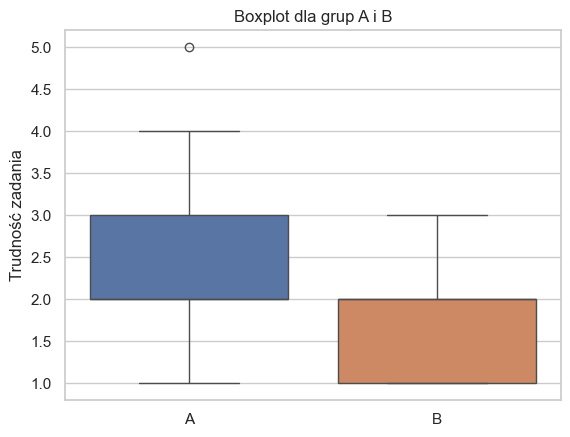

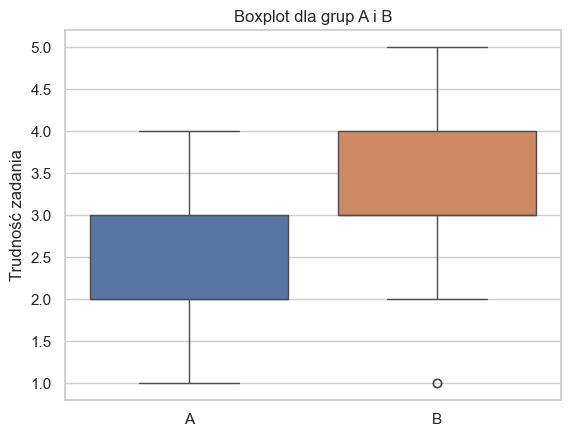

In [11]:
# istotne statystycznie
plot_two_boxplots(df_1['diffA'][df_1['Płeć'] == 'M'], df_1['diffB'][df_1['Płeć'] == 'M'], 'A', 'B', 'Trudność zadania')
plot_two_boxplots(df_3['diffA'][df_3['Płeć'] == 'K'], df_3['diffB'][df_3['Płeć'] == 'K'], 'A', 'B', 'Trudność zadania')

In [12]:
# rok urodzenia
col = 'Rok_urodzenia'
conduct_test(col)

Groups: [2002 2003 2001 2000 2004]
-------------------------------
Image: Kolekcja
Group: 2002
Wilcoxon statistic: 131.0
p-value: 0.8259750007582517
Brak podstaw do odrzucenia H0.
----------
Group: 2003
Wilcoxon statistic: 273.0
p-value: 0.8891548788825967
Brak podstaw do odrzucenia H0.
----------
Group: 2001
Wilcoxon statistic: 42.5
p-value: 0.15936875337737888
Brak podstaw do odrzucenia H0.
----------
Group: 2000
Wilcoxon statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 2004
Wilcoxon statistic: 11.0
p-value: 0.6028782026438425
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 2002
Wilcoxon statistic: 17.0
p-value: 0.8871157967199846
Brak podstaw do odrzucenia H0.
----------
Group: 2003
Wilcoxon statistic: 47.0
p-value: 0.7252344374914003
Brak podstaw do odrzucenia H0.
----------
Group: 2001
Wilcoxon statistic: 4.0
p-value: 0.16820413904818
Brak podstaw do odrzucenia H0.
----------
Group: 2000
only one sample
-----

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


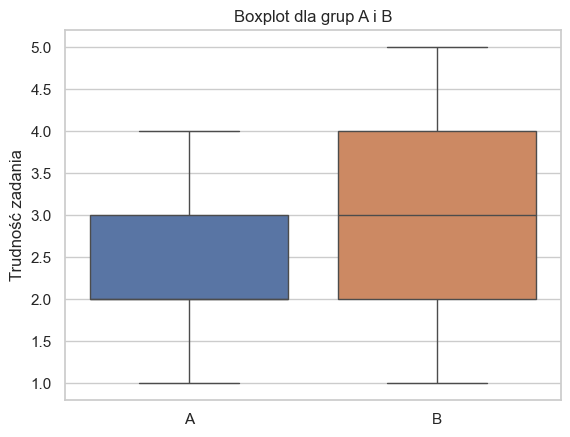

In [13]:
plot_two_boxplots(df_3['diffA'][df_3['Rok_urodzenia'] == 2003], df_3['diffB'][df_3['Rok_urodzenia'] == 2003], 'A', 'B', 'Trudność zadania')

In [14]:
# rok studiów
col = 'Rok_studiów'
conduct_test(col)

Groups: [2 1 3]
-------------------------------
Image: Kolekcja
Group: 2
Wilcoxon statistic: 84.0
p-value: 0.9459190956661397
Brak podstaw do odrzucenia H0.
----------
Group: 1
Wilcoxon statistic: 493.5
p-value: 0.7791101653977978
Brak podstaw do odrzucenia H0.
----------
Group: 3
Wilcoxon statistic: 49.0
p-value: 0.049204199641110946
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
-------------------------------
Image: Suma
Group: 2
Wilcoxon statistic: 7.0
p-value: 0.892250486903652
Brak podstaw do odrzucenia H0.
----------
Group: 1
Wilcoxon statistic: 90.0
p-value: 0.8380900741724371
Brak podstaw do odrzucenia H0.
----------
Group: 3
Wilcoxon statistic: 2.0
p-value: 0.07074986707637762
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: 2
Wilcoxon statistic: 6.0
p-value: 0.31731050786291415
Brak podstaw do odrzucenia H0.
----------
Group: 1
Wilcoxon statistic: 49.5
p-value: 0.10352991672903858
Brak podstaw do odrzucenia H0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


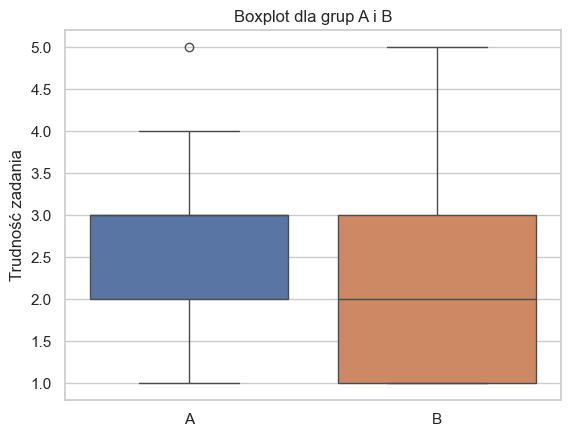

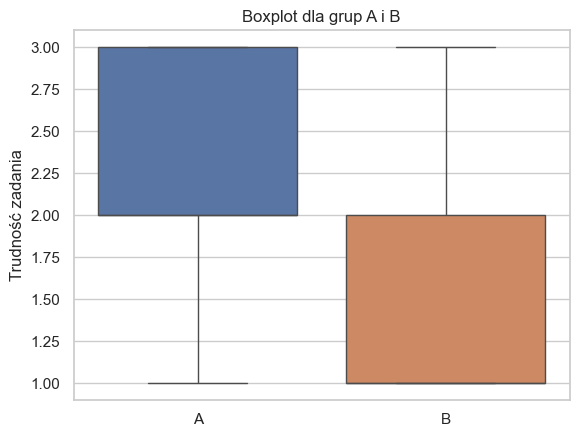

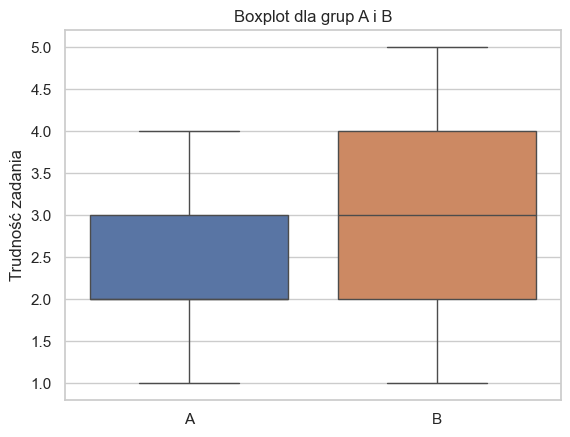

In [15]:
col = 'Rok_studiów'
var = 3
df = df_coll.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 3
df = df_2.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 1
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [16]:
# kierunek studiów
col = 'Kierunek_studiów'
conduct_test(col)

Groups: ['MISMaP Geografia' 'Gospodarka przestrzenna' 'Geografia']
-------------------------------
Image: Kolekcja
Group: MISMaP Geografia
Wilcoxon statistic: 8.5
p-value: 0.6662276454096188
Brak podstaw do odrzucenia H0.
----------
Group: Gospodarka przestrzenna
Wilcoxon statistic: 22.0
p-value: 0.564773144879279
Brak podstaw do odrzucenia H0.
----------
Group: Geografia
Wilcoxon statistic: 988.5
p-value: 0.43412028856706664
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: MISMaP Geografia
Wilcoxon statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: Gospodarka przestrzenna
Wilcoxon statistic: 3.0
p-value: 0.4614509878333607
Brak podstaw do odrzucenia H0.
----------
Group: Geografia
Wilcoxon statistic: 106.5
p-value: 0.33205786065786724
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: MISMaP Geografia
Wilcoxon statistic: 1.0
p-value: 0.6547208460185769
Brak podstaw do odrzuceni

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


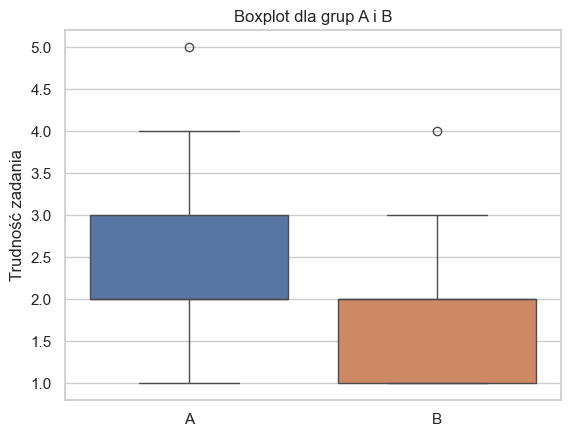

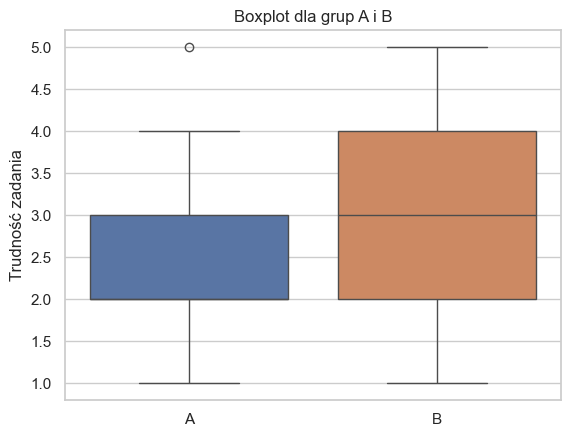

In [17]:
col = 'Kierunek_studiów'
var = 'Geografia'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [18]:
# specjalność
col = 'Specjalność'
conduct_test(col)

Groups: ['SPOŁ-EKO' 'NO_VAL' 'GEOINF ' 'FIZ ']
-------------------------------
Image: Kolekcja
Group: SPOŁ-EKO
Wilcoxon statistic: 41.5
p-value: 0.2803066781320367
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 22.0
p-value: 0.564773144879279
Brak podstaw do odrzucenia H0.
----------
Group: GEOINF 
Wilcoxon statistic: 336.5
p-value: 0.2941057433304173
Brak podstaw do odrzucenia H0.
----------
Group: FIZ 
Wilcoxon statistic: 61.0
p-value: 0.4487122585042369
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: SPOŁ-EKO
Wilcoxon statistic: 2.5
p-value: 0.15729920705028516
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 3.0
p-value: 0.4614509878333607
Brak podstaw do odrzucenia H0.
----------
Group: GEOINF 
Wilcoxon statistic: 38.0
p-value: 0.3585094572590949
Brak podstaw do odrzucenia H0.
----------
Group: FIZ 
Wilcoxon statistic: 10.0
p-value: 0.4903143196690689
Brak podstaw do odrzucenia H0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


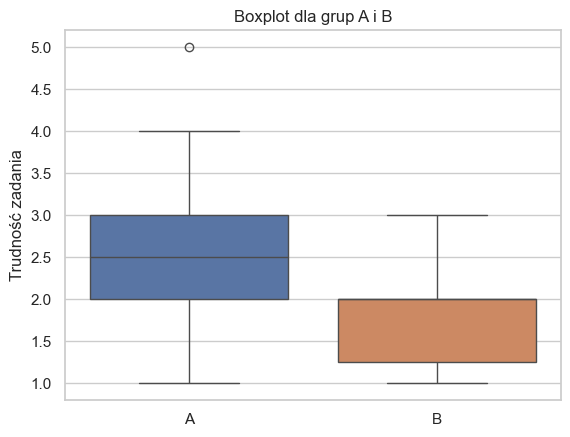

In [19]:
col = 'Specjalność'
var = 'GEOINF '
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [20]:
# wady wzroku
col = 'Wady_wzroku'
conduct_test(col)

Groups: [0 1]
-------------------------------
Image: Kolekcja
Group: 0
Wilcoxon statistic: 211.5
p-value: 0.11933617269209953
Brak podstaw do odrzucenia H0.
----------
Group: 1
Wilcoxon statistic: 551.5
p-value: 0.6990397939435575
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 0
Wilcoxon statistic: 12.5
p-value: 0.11884835135568013
Brak podstaw do odrzucenia H0.
----------
Group: 1
Wilcoxon statistic: 95.5
p-value: 0.719785050556927
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: 0
Wilcoxon statistic: 19.0
p-value: 0.10418622793024326
Brak podstaw do odrzucenia H0.
----------
Group: 1
Wilcoxon statistic: 46.5
p-value: 0.04030165548578597
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
-------------------------------
Image: 2
Group: 0
Wilcoxon statistic: 18.0
p-value: 0.0388004368700973
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: 1
Wilcoxon s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


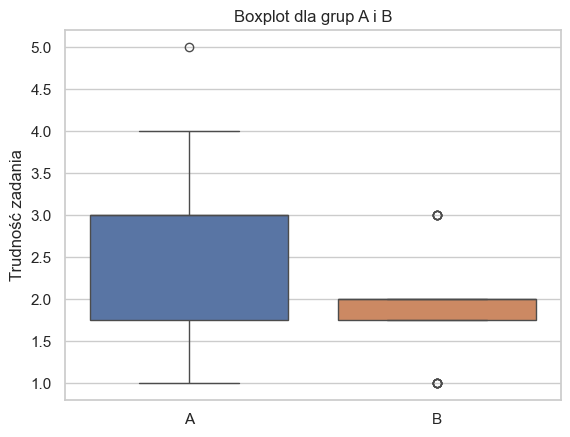

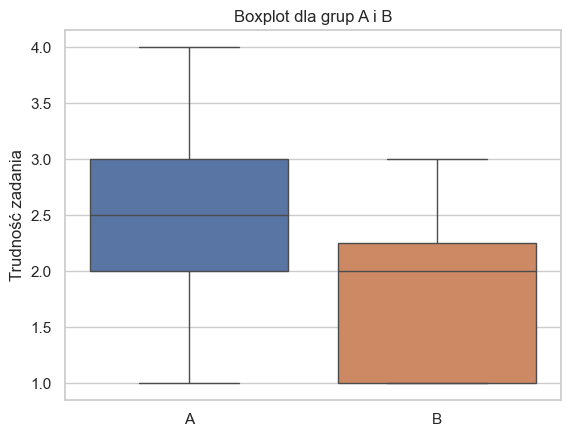

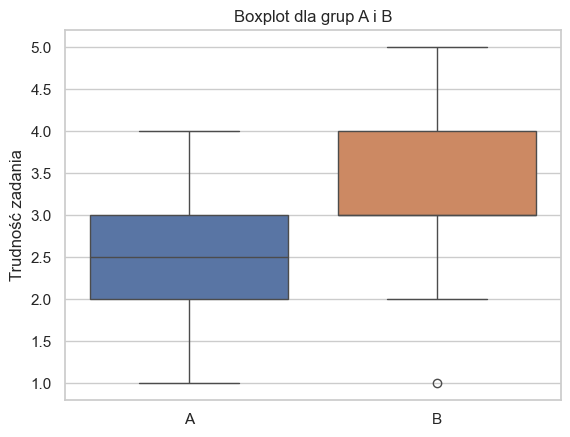

In [21]:
col = 'Wady_wzroku'
var = 1
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 0
df = df_2.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 1
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [22]:
# matura POL - pisał / nie pisał
col = 'POL'
conduct_test(col)

Groups: ['VAL' 'NO_VAL']
-------------------------------
Image: Kolekcja
Group: VAL
Wilcoxon statistic: 65.0
p-value: 0.35702032438810016
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 1020.5
p-value: 0.891625294385662
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: VAL
Wilcoxon statistic: 1.0
p-value: 0.14077277337135014
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 166.5
p-value: 0.8172948451809121
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: VAL
Wilcoxon statistic: 5.0
p-value: 0.4795001221869535
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 81.0
p-value: 0.012290372058100475
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
-------------------------------
Image: 2
Group: VAL
Wilcoxon statistic: 0.0
p-value: 0.016351221575805885
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


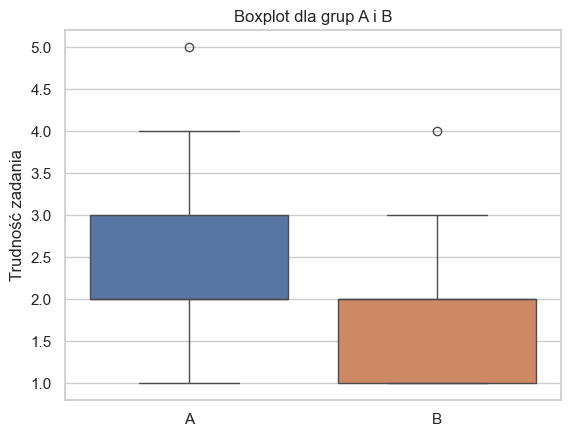

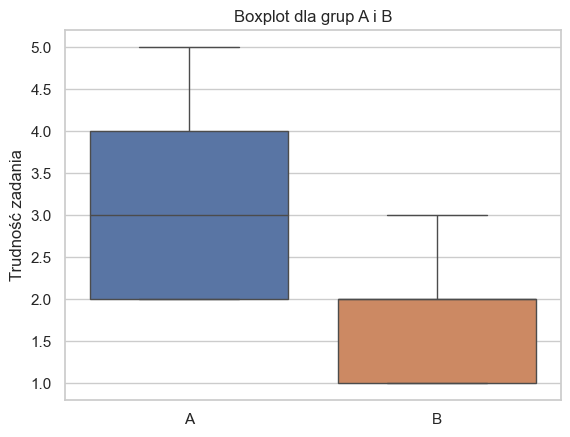

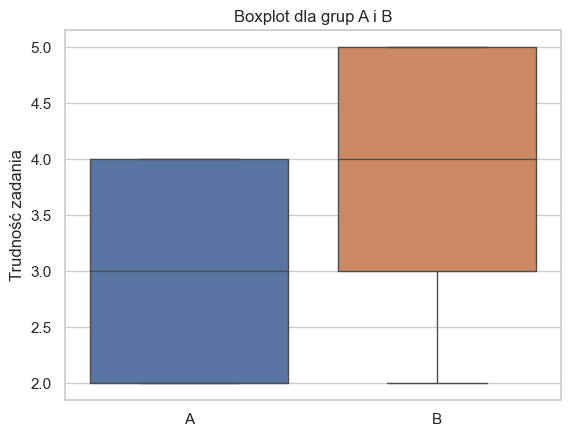

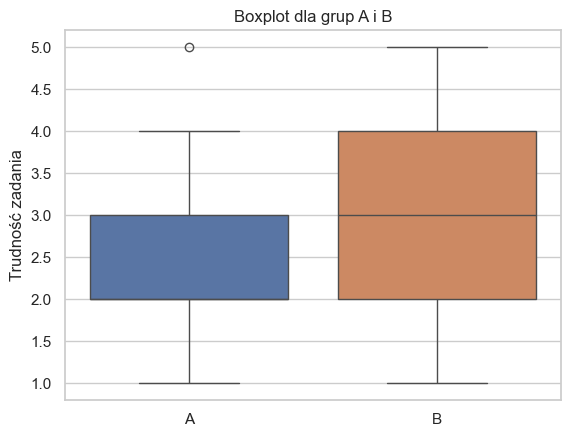

In [23]:
col = 'POL'
var = 'NO_VAL'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'VAL'
df = df_2.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'VAL'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'NO_VAL'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [24]:
# matura MAT - pisał / nie pisał
col = 'MAT'
conduct_test(col)

Groups: ['VAL' 'NO_VAL']
-------------------------------
Image: Kolekcja
Group: VAL
Wilcoxon statistic: 398.5
p-value: 0.49433056363203043
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 407.5
p-value: 0.9716775968851087
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: VAL
Wilcoxon statistic: 59.5
p-value: 0.4169566234865252
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 44.0
p-value: 0.9152392003678753
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: VAL
Wilcoxon statistic: 40.0
p-value: 0.07140684831528472
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 23.5
p-value: 0.05685076988810895
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: VAL
Wilcoxon statistic: 45.5
p-value: 0.6518859872435963
Brak podstaw do odrzucenia H0.
----------
Group: NO_VAL
Wilcoxon statistic: 36.0
p-valu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


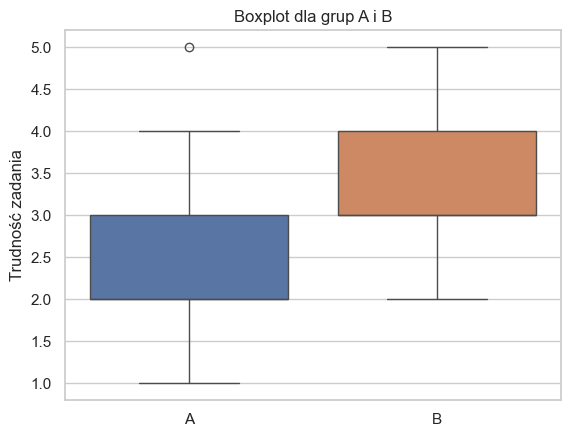

In [25]:
col = 'MAT'
var = 'NO_VAL'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [26]:
# matura HIST - pisał / nie pisał
col = 'HIST'
conduct_test(col)

Groups: ['NO_VAL' 'VAL']
-------------------------------
Image: Kolekcja
Group: NO_VAL
Wilcoxon statistic: 1349.5
p-value: 0.6785641429059486
Brak podstaw do odrzucenia H0.
----------
Group: VAL
Wilcoxon statistic: 10.5
p-value: 0.5270892568655381
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: NO_VAL
Wilcoxon statistic: 191.0
p-value: 0.5623781156636163
Brak podstaw do odrzucenia H0.
----------
Group: VAL
Wilcoxon statistic: 0.0
p-value: 0.31731050786291415
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: NO_VAL
Wilcoxon statistic: 105.0
p-value: 0.006129961030796137
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: VAL
Wilcoxon statistic: 0.0
p-value: 0.31731050786291415
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: NO_VAL
Wilcoxon statistic: 124.0
p-value: 0.4447419700469334
Brak podstaw do odrzucenia H0.
----------
Group: VAL

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


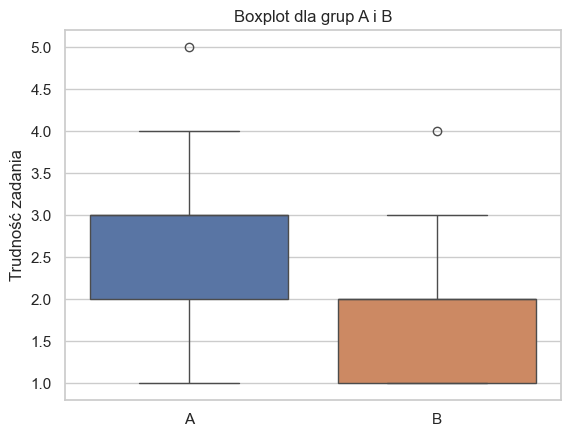

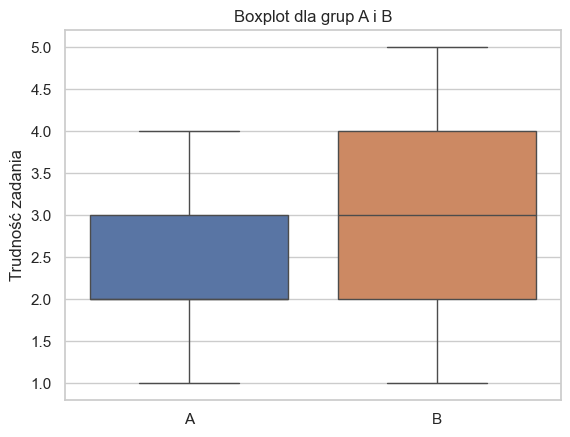

In [27]:
col = 'HIST'
var = 'NO_VAL'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [28]:
# dominujący typ uczenia
col = 'Typ_uczenia'
conduct_test(col)

Groups: ['Kinestetyk' 'Brak dominującego' 'Wzrokowiec' 'Słuchowiec']
-------------------------------
Image: Kolekcja
Group: Kinestetyk
Wilcoxon statistic: 1.5
p-value: 0.1974660733580187
Brak podstaw do odrzucenia H0.
----------
Group: Brak dominującego
Wilcoxon statistic: 95.0
p-value: 0.6987412064340817
Brak podstaw do odrzucenia H0.
----------
Group: Wzrokowiec
Wilcoxon statistic: 482.0
p-value: 0.3635993261466334
Brak podstaw do odrzucenia H0.
----------
Group: Słuchowiec
Wilcoxon statistic: 25.5
p-value: 0.4903824036785194
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: Kinestetyk
Wilcoxon statistic: 0.0
p-value: 0.5
Brak podstaw do odrzucenia H0.
----------
Group: Brak dominującego
Wilcoxon statistic: 15.0
p-value: 0.6713732405408726
Brak podstaw do odrzucenia H0.
----------
Group: Wzrokowiec
Wilcoxon statistic: 55.5
p-value: 0.5127870949956407
Brak podstaw do odrzucenia H0.
----------
Group: Słuchowiec
Wilcoxon statistic: 2.0
p-value:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


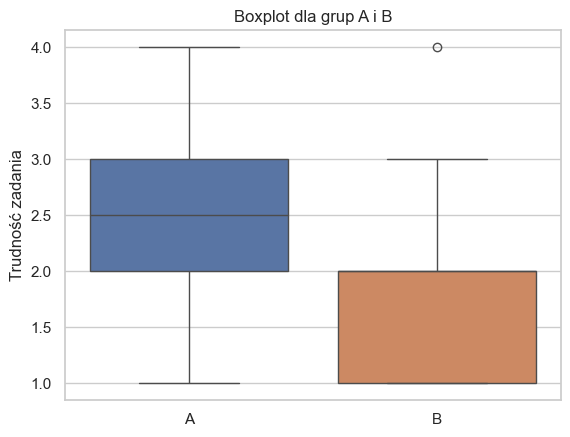

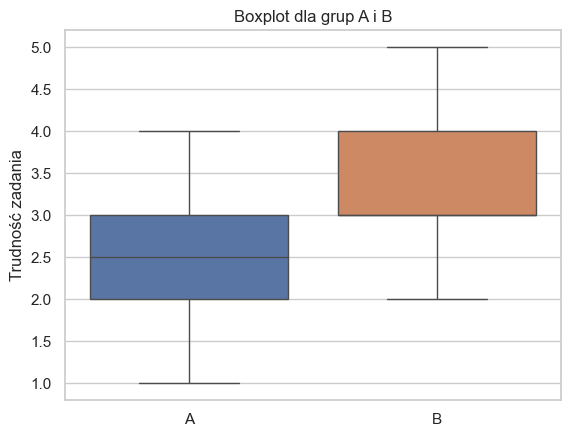

In [29]:
col = 'Typ_uczenia'
var = 'Wzrokowiec'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'Brak dominującego'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [30]:
# ilość snu
col = 'Ilość_snu'
conduct_test(col)

Groups: ['6' '<6' '8' '7' '8<']
-------------------------------
Image: Kolekcja
Group: 6
Wilcoxon statistic: 95.0
p-value: 0.4665578079030631
Brak podstaw do odrzucenia H0.
----------
Group: <6
Wilcoxon statistic: 111.5
p-value: 0.6119627512213199
Brak podstaw do odrzucenia H0.
----------
Group: 8
Wilcoxon statistic: 18.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 7
Wilcoxon statistic: 83.0
p-value: 0.9090807435274522
Brak podstaw do odrzucenia H0.
----------
Group: 8<
Wilcoxon statistic: 39.5
p-value: 0.6579268252758792
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: 6
Wilcoxon statistic: 19.0
p-value: 0.3815932102038512
Brak podstaw do odrzucenia H0.
----------
Group: <6
Wilcoxon statistic: 7.0
p-value: 0.45934672269888
Brak podstaw do odrzucenia H0.
----------
Group: 8
Wilcoxon statistic: 3.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
Group: 7
Wilcoxon statistic: 9.5
p-value: 0.8316408424990329
Brak podstaw 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


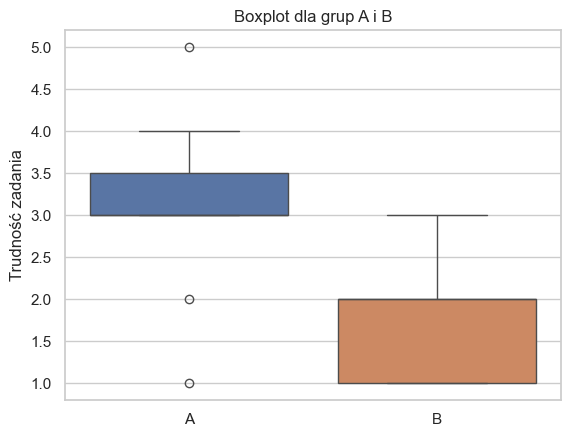

In [31]:
col = 'Ilość_snu'
var = '6'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [32]:
# samopoczucie
col = 'Samopocz'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
Wilcoxon statistic: 753.0
p-value: 0.21035635420457766
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 45.0
p-value: 0.9715373831604056
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 12.0
p-value: 0.20124262095772383
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
Wilcoxon statistic: 76.0
p-value: 0.16409323634648
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 9.5
p-value: 0.84375
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 0.0
p-value: 0.10247043485974937
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
Wilcoxon statistic: 64.5
p-value: 0.011170982465948902
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: średni
Wilcoxon statistic: 4.0
p-value: 0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


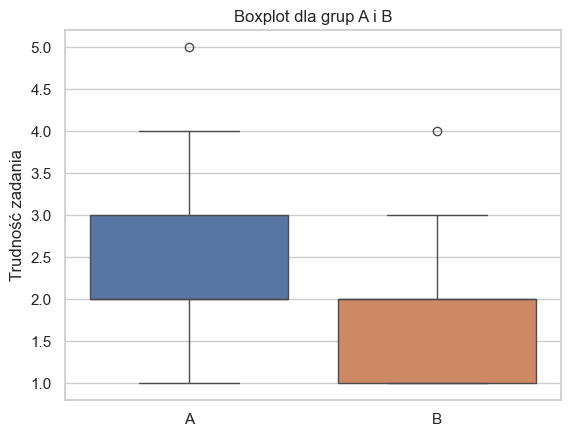

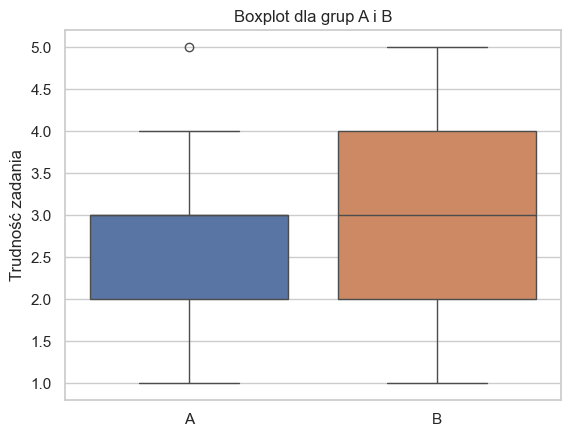

In [33]:
col = 'Samopocz'
var = 'wysoki'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [34]:
# stres
col = 'Stres'
conduct_test(col)

Groups: ['niski' 'średni' 'wysoki']
-------------------------------
Image: Kolekcja
Group: niski
Wilcoxon statistic: 605.5
p-value: 0.574577367599347
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 49.5
p-value: 0.3194222523969762
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
Wilcoxon statistic: 47.0
p-value: 0.4437559425903518
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: niski
Wilcoxon statistic: 68.5
p-value: 0.45422901052037123
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 4.5
p-value: 0.1956677425436415
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
Wilcoxon statistic: 7.0
p-value: 0.4605966187047713
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: niski
Wilcoxon statistic: 43.0
p-value: 0.030709786296226654
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: średni
Wilcoxon statistic: 7.0
p-

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


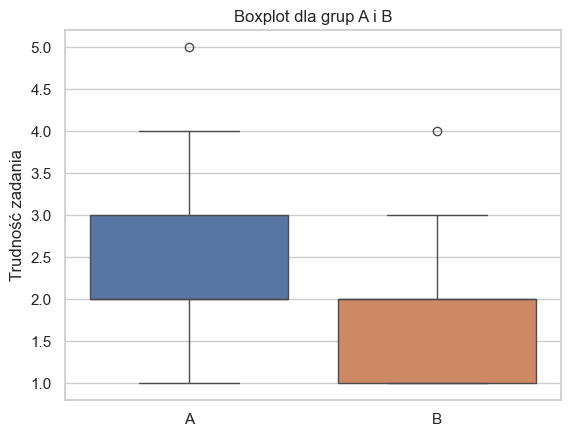

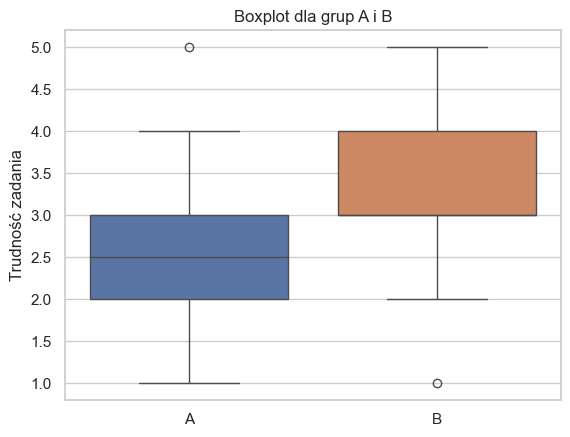

In [35]:
col = 'Stres'
var = 'niski'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [36]:
# zmęczenie
col = 'Zmęcz'
conduct_test(col)

Groups: ['średni' 'niski' 'wysoki']
-------------------------------
Image: Kolekcja
Group: średni
Wilcoxon statistic: 87.0
p-value: 0.48603032328910567
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 315.0
p-value: 0.7681505491557481
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
Wilcoxon statistic: 173.5
p-value: 0.9577634652173481
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: średni
Wilcoxon statistic: 10.5
p-value: 0.2864220227778588
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 49.0
p-value: 0.8237253836719792
Brak podstaw do odrzucenia H0.
----------
Group: wysoki
Wilcoxon statistic: 17.0
p-value: 0.887815335823155
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: średni
Wilcoxon statistic: 0.0
p-value: 0.014058605323737277
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: niski
Wilcoxon statistic: 48.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


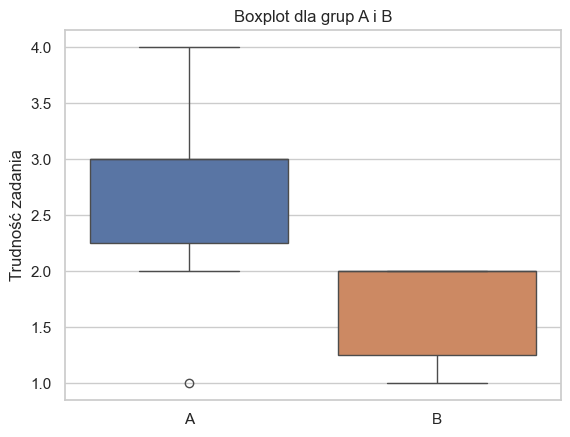

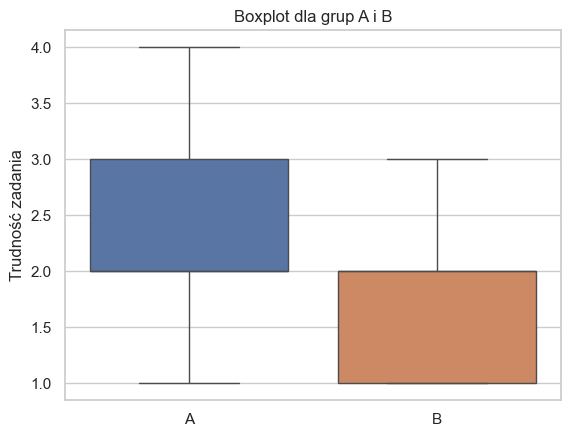

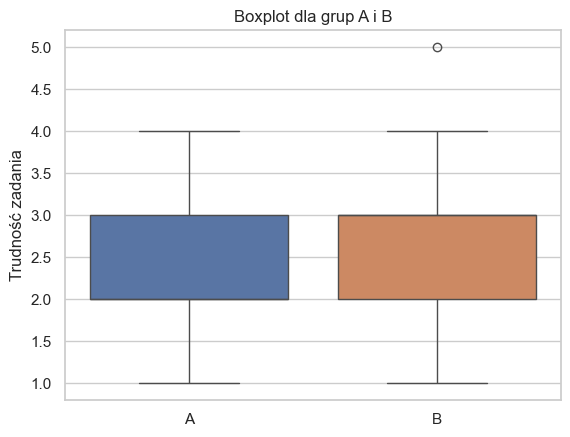

In [37]:
col = 'Zmęcz'
var = 'średni'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'niski'
df = df_2.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'niski'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [38]:
# czytanie map
col = 'Czyt_map'
conduct_test(col)

Groups: ['wysoki' 'średni']
-------------------------------
Image: Kolekcja
Group: wysoki
Wilcoxon statistic: 1262.5
p-value: 0.7634558060216384
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 20.0
p-value: 0.42596383720538145
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
Wilcoxon statistic: 180.5
p-value: 0.6044619483766478
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 0.0
p-value: 0.17971249487899976
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
Wilcoxon statistic: 99.5
p-value: 0.013561889569991378
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: średni
Wilcoxon statistic: 1.5
p-value: 0.4142161782425252
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: wysoki
Wilcoxon statistic: 114.0
p-value: 0.45170432656693216
Brak podstaw do odrzucenia H0.
---------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


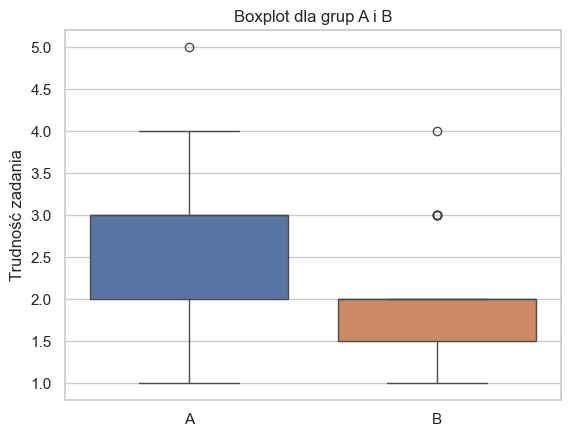

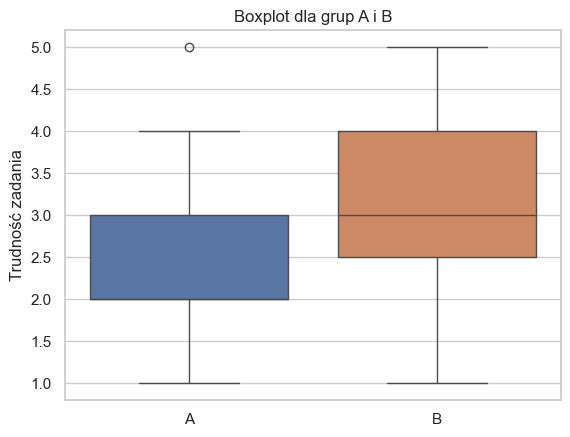

In [39]:
col = 'Czyt_map'
var = 'wysoki'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [40]:
# podzielność uwagi
col = 'Podziel_uwg'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
Wilcoxon statistic: 188.5
p-value: 0.2213998448839668
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 237.5
p-value: 0.6071461921449399
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 85.5
p-value: 0.6925759555083046
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
Wilcoxon statistic: 17.5
p-value: 0.08480711559554274
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 39.0
p-value: 0.6466114706679185
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 6.0
p-value: 0.6802795473344503
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
Wilcoxon statistic: 11.0
p-value: 0.010897472025019159
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: średni
Wilcoxon statistic: 16

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


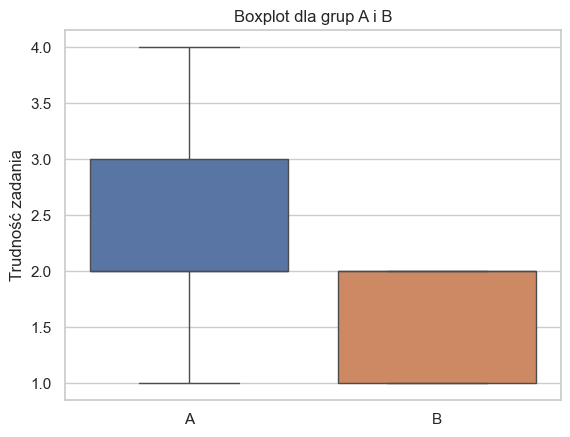

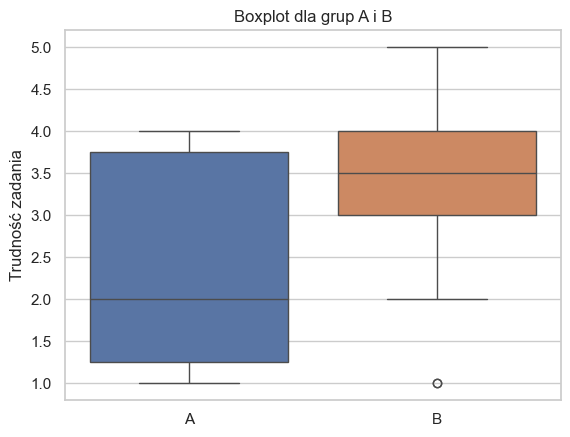

In [41]:
col = 'Podziel_uwg'
var = 'wysoki'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'średni'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [42]:
# analityczne myślenie
col = 'Analit_myśl'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
Wilcoxon statistic: 631.0
p-value: 0.2251486560264816
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 127.5
p-value: 0.3258007162855292
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 1.0
p-value: 0.6547208460185769
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
Wilcoxon statistic: 75.0
p-value: 0.15479257690362677
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 9.0
p-value: 0.20252658565594883
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 0.0
p-value: 1.0
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
Wilcoxon statistic: 25.5
p-value: 0.0005831653459350975
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: średni
Wilcoxon statistic: 18.5
p-value: 0.6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


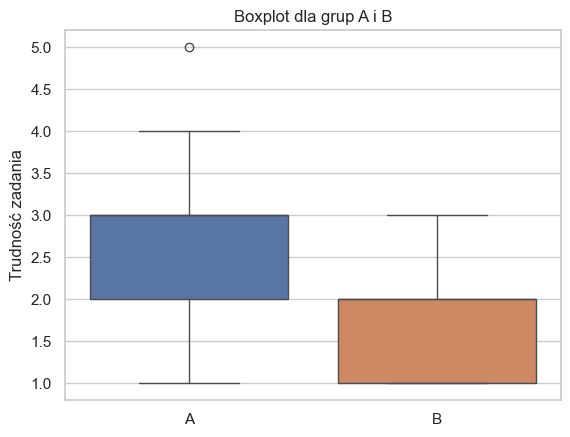

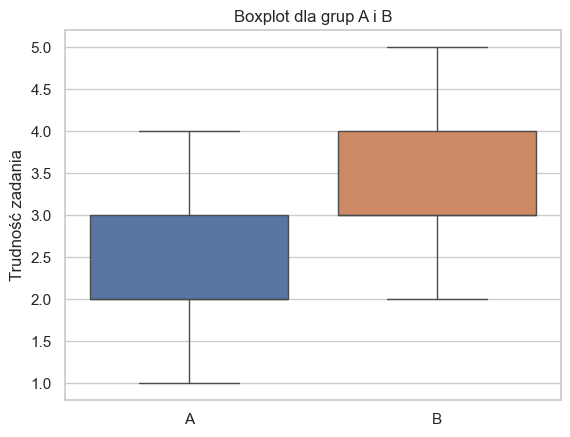

In [43]:
col = 'Analit_myśl'
var = 'wysoki'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'średni'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [44]:
# spostrzegawczość
col = 'Spostrzeg'
conduct_test(col)

Groups: ['wysoki' 'średni' 'niski']
-------------------------------
Image: Kolekcja
Group: wysoki
Wilcoxon statistic: 650.5
p-value: 0.9033538073733057
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 121.0
p-value: 0.8498657088836253
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 10.5
p-value: 0.14189351577032386
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
Wilcoxon statistic: 88.0
p-value: 0.7757097077807202
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 16.5
p-value: 0.8317967818365045
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 0.0
p-value: 0.10247043485974937
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
Wilcoxon statistic: 61.0
p-value: 0.0453458126887287
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: średni
Wilcoxon statistic: 11.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


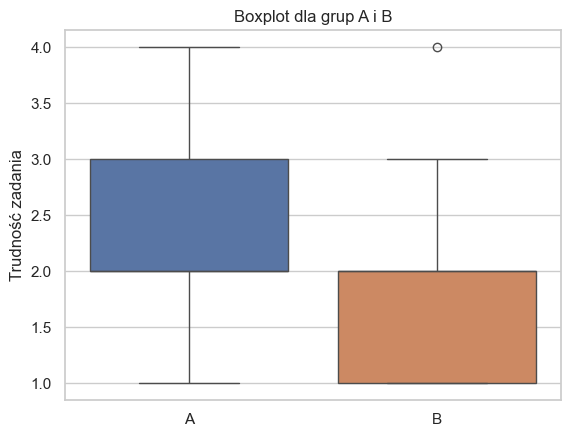

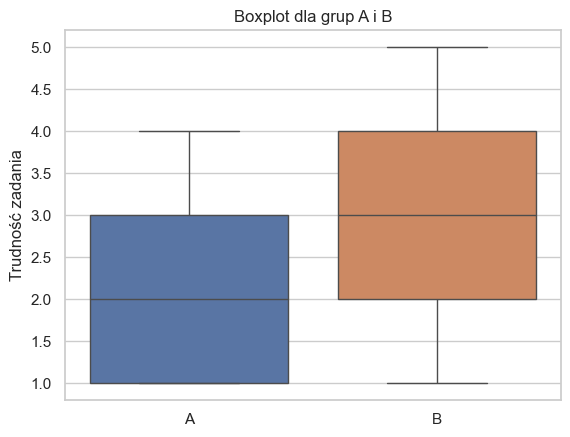

In [45]:
col = 'Spostrzeg'
var = 'wysoki'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [46]:
# czytanie ze zrozumieniem
col = 'Czyt_ze_zroz'
conduct_test(col)

Groups: ['wysoki' 'niski' 'średni']
-------------------------------
Image: Kolekcja
Group: wysoki
Wilcoxon statistic: 698.5
p-value: 0.694487146810253
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 75.5
p-value: 0.41776497096138276
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 15.0
p-value: 0.31731050786291415
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wysoki
Wilcoxon statistic: 78.5
p-value: 0.5024673593614378
Brak podstaw do odrzucenia H0.
----------
Group: niski
Wilcoxon statistic: 10.0
p-value: 0.25550882029402844
Brak podstaw do odrzucenia H0.
----------
Group: średni
Wilcoxon statistic: 1.5
p-value: 0.4142161782425252
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: wysoki
Wilcoxon statistic: 34.0
p-value: 0.003020953375684402
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: niski
Wilcoxon statistic: 10.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


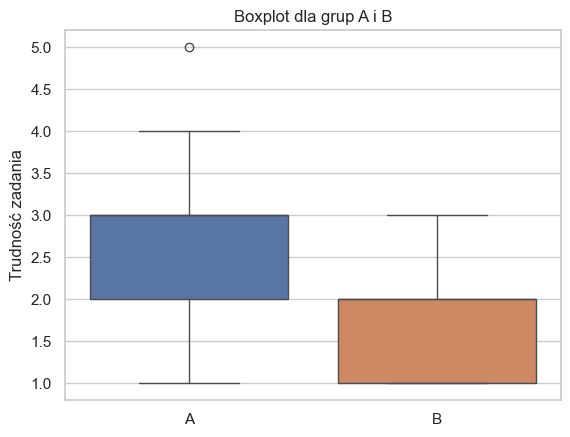

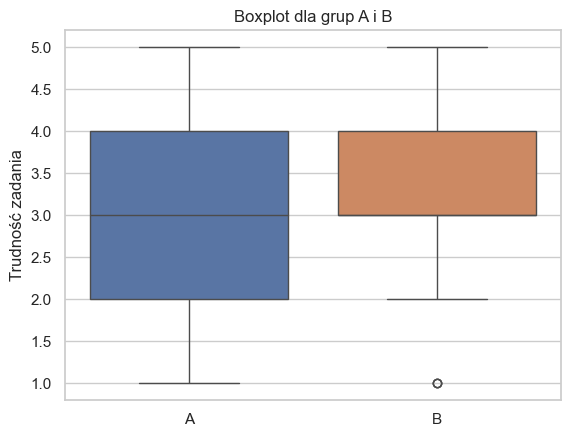

In [47]:
col = 'Czyt_ze_zroz'
var = 'wysoki'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [48]:
# pytanie 1 - preferencja A vs B  - przed badaniem
col = 'Quest1_before'
conduct_test(col)

Groups: ['B' 'A']
-------------------------------
Image: Kolekcja
Group: B
Wilcoxon statistic: 1318.0
p-value: 0.5552929951819299
Brak podstaw do odrzucenia H0.
----------
Group: A
Wilcoxon statistic: 13.5
p-value: 0.931286665116335
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: B
Wilcoxon statistic: 170.0
p-value: 0.44648342756397774
Brak podstaw do odrzucenia H0.
----------
Group: A
Wilcoxon statistic: 1.0
p-value: 0.6547208460185769
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: B
Wilcoxon statistic: 94.5
p-value: 0.004920248935002123
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: A
Wilcoxon statistic: 1.0
p-value: 0.6547208460185769
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: B
Wilcoxon statistic: 126.5
p-value: 0.49102071687699866
Brak podstaw do odrzucenia H0.
----------
Group: A
Wilcoxon statistic: 0.0
p-value: 0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


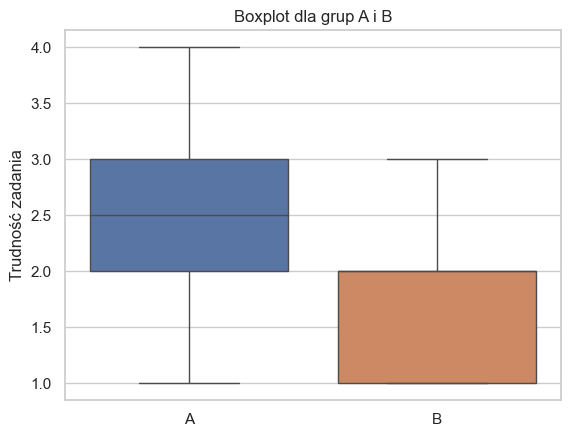

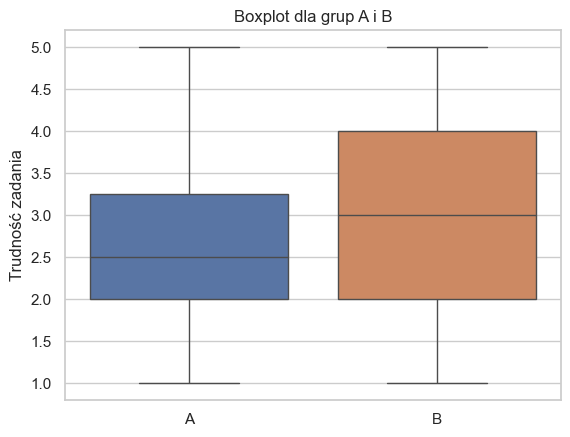

In [49]:
col = 'Quest1_before'
var = 'B'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [50]:
# pytanie 1 - preferencja A vs B  - po badaniu
col = 'Quest1_after'
conduct_test(col)

Groups: ['B' 'A']
-------------------------------
Image: Kolekcja
Group: B
Wilcoxon statistic: 718.5
p-value: 0.1321718349560906
Brak podstaw do odrzucenia H0.
----------
Group: A
Wilcoxon statistic: 83.0
p-value: 0.14066824968220393
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: B
Wilcoxon statistic: 74.5
p-value: 0.08806014436491448
Brak podstaw do odrzucenia H0.
----------
Group: A
Wilcoxon statistic: 8.0
p-value: 0.15049923625515474
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: B
Wilcoxon statistic: 42.5
p-value: 0.004230679688913614
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: A
Wilcoxon statistic: 19.5
p-value: 0.7127018566581784
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: B
Wilcoxon statistic: 106.0
p-value: 0.3187535268556403
Brak podstaw do odrzucenia H0.
----------
Group: A
Wilcoxon statistic: 5.0
p-value: 1.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


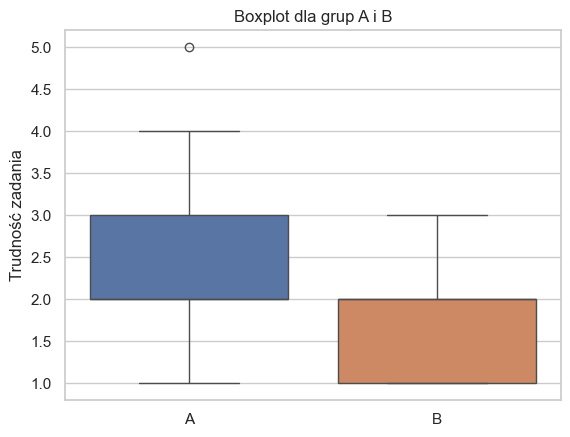

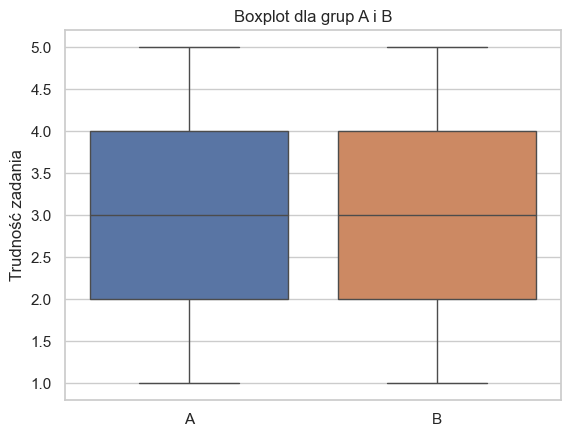

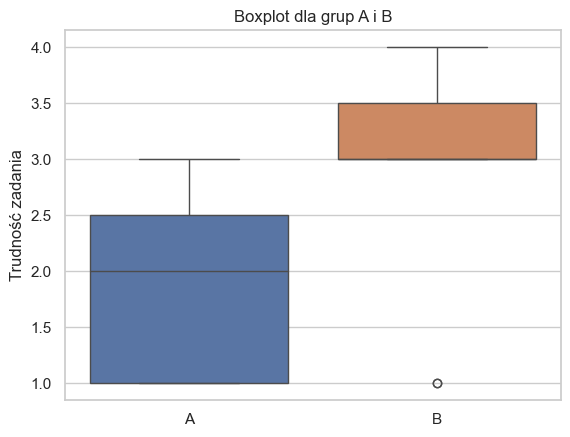

In [51]:
col = 'Quest1_after'
var = 'B'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'A'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [52]:
# pytanie 2 - preferencja mapa vs tabela vs tekst vs wykres - przed badaniem
col = 'Quest2_before'
conduct_test(col)

Groups: ['wykres' 'mapa' 'tabela' 'tekst']
-------------------------------
Image: Kolekcja
Group: wykres
Wilcoxon statistic: 68.0
p-value: 0.25710130835283496
Brak podstaw do odrzucenia H0.
----------
Group: mapa
Wilcoxon statistic: 341.0
p-value: 0.22592401447940824
Brak podstaw do odrzucenia H0.
----------
Group: tabela
Wilcoxon statistic: 33.5
p-value: 0.22218603966336792
Brak podstaw do odrzucenia H0.
----------
Group: tekst
Wilcoxon statistic: 10.5
p-value: 0.27139601757306
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wykres
Wilcoxon statistic: 4.0
p-value: 0.16700719585656576
Brak podstaw do odrzucenia H0.
----------
Group: mapa
Wilcoxon statistic: 43.0
p-value: 0.19121470112098093
Brak podstaw do odrzucenia H0.
----------
Group: tabela
Wilcoxon statistic: 3.0
p-value: 0.11384629800665805
Brak podstaw do odrzucenia H0.
----------
Group: tekst
Wilcoxon statistic: 0.0
p-value: 0.15729920705028502
Brak podstaw do odrzucenia H0.
-------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


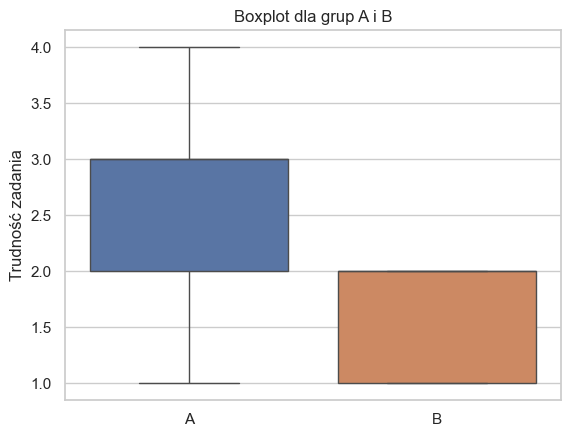

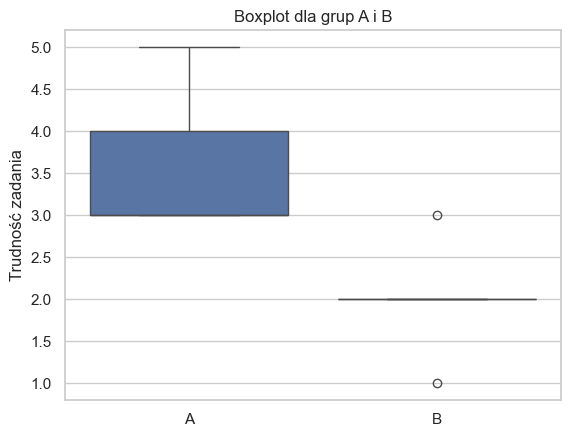

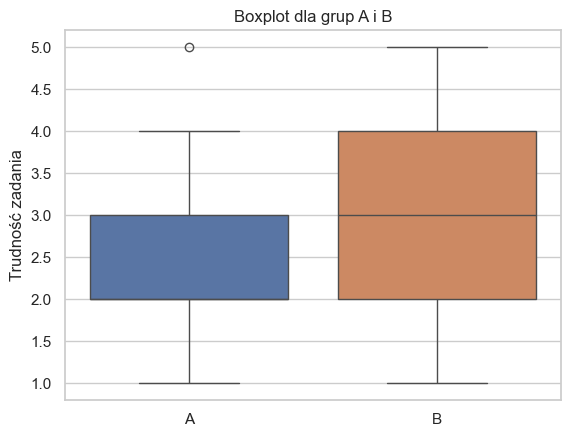

In [53]:
col = 'Quest2_before'
var = 'wykres'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'tabela'
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'mapa'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [54]:
# pytanie 2 - preferencja mapa vs tabela vs tekst vs wykres - po badaniu
col = 'Quest2_after'
conduct_test(col)

Groups: ['wykres' 'mapa' 'tabela' 'tekst']
-------------------------------
Image: Kolekcja
Group: wykres
Wilcoxon statistic: 132.0
p-value: 0.032379769280482515
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: mapa
Wilcoxon statistic: 302.0
p-value: 0.19506855433348502
Brak podstaw do odrzucenia H0.
----------
Group: tabela
Wilcoxon statistic: 31.0
p-value: 0.8556516543644965
Brak podstaw do odrzucenia H0.
----------
Group: tekst
Wilcoxon statistic: 1.0
p-value: 0.6547208460185769
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: wykres
Wilcoxon statistic: 9.0
p-value: 0.009784237688002613
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: mapa
Wilcoxon statistic: 19.5
p-value: 0.2228009911811346
Brak podstaw do odrzucenia H0.
----------
Group: tabela
Wilcoxon statistic: 6.5
p-value: 0.7864570351373764
Brak podstaw do odrzucenia H0.
----------
Group: tekst
Wilcoxon statistic: 0.0
p-valu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


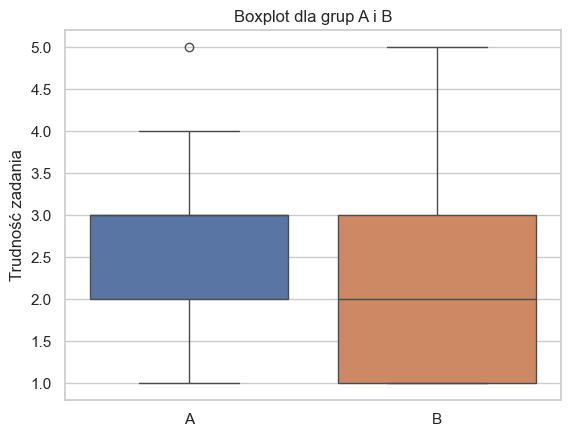

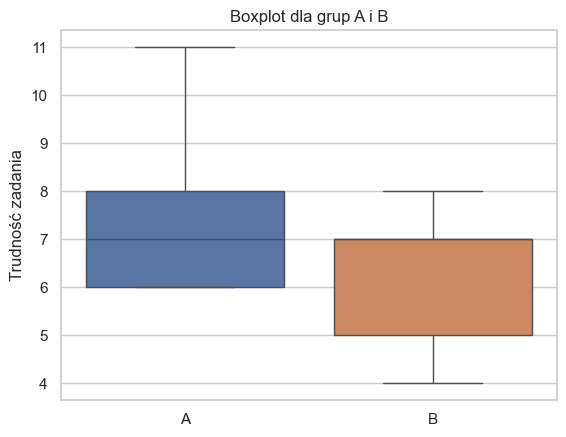

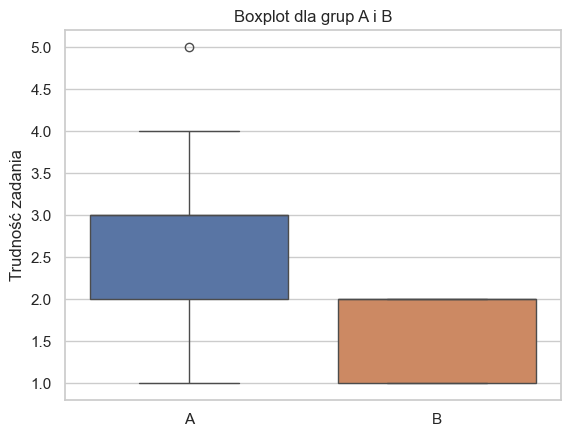

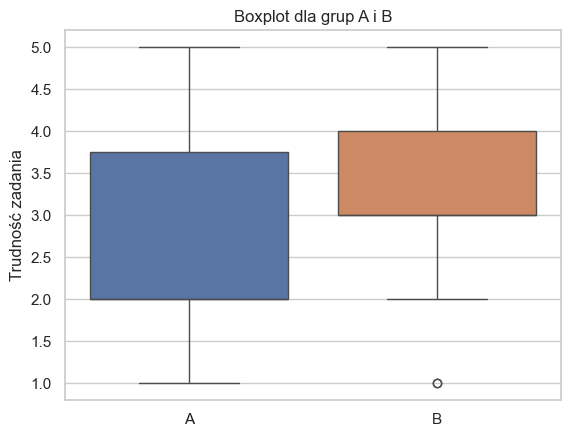

In [55]:
col = 'Quest2_after'
var = 'wykres'
df = df_coll.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_sum.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = 'mapa'
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [56]:
# pytanie 1 - preferencja A vs B  - zmiana zdania
col = 'is_change_1'
conduct_test(col)

Groups: [False  True]
-------------------------------
Image: Kolekcja
Group: False
Wilcoxon statistic: 882.5
p-value: 0.3708981389317575
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilcoxon statistic: 84.0
p-value: 0.6448405687484553
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: False
Wilcoxon statistic: 94.0
p-value: 0.28574068544931996
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilcoxon statistic: 16.0
p-value: 0.7739720006501322
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: False
Wilcoxon statistic: 61.5
p-value: 0.026768814262904454
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
Group: True
Wilcoxon statistic: 11.0
p-value: 0.203125
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 2
Group: False
Wilcoxon statistic: 112.5
p-value: 0.271782261463255
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilcoxon statis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


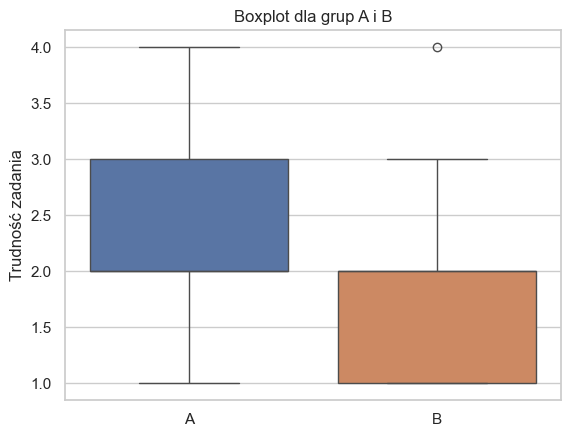

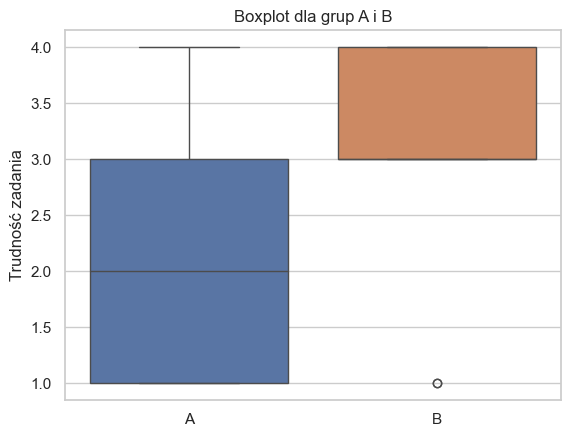

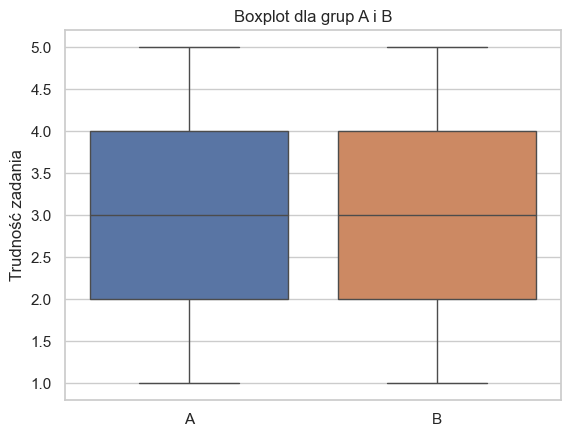

In [57]:
col = 'is_change_1'
var = False
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = True
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = False
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

In [58]:
# pytanie 2 - preferencja mapa vs tabela vs tekst vs wykres - zmiana zdania
col = 'is_change_2'
conduct_test(col)

Groups: [False  True]
-------------------------------
Image: Kolekcja
Group: False
Wilcoxon statistic: 297.0
p-value: 0.7588789741049553
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilcoxon statistic: 471.5
p-value: 0.3075887084985446
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: Suma
Group: False
Wilcoxon statistic: 37.5
p-value: 0.904062119780416
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilcoxon statistic: 49.5
p-value: 0.11078086253381512
Brak podstaw do odrzucenia H0.
----------
-------------------------------
Image: 1
Group: False
Wilcoxon statistic: 32.0
p-value: 0.5714505727049992
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilcoxon statistic: 24.0
p-value: 0.002404979673282456
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
----------
-------------------------------
Image: 2
Group: False
Wilcoxon statistic: 18.0
p-value: 0.16279692662103762
Brak podstaw do odrzucenia H0.
----------
Group: True
Wilc

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


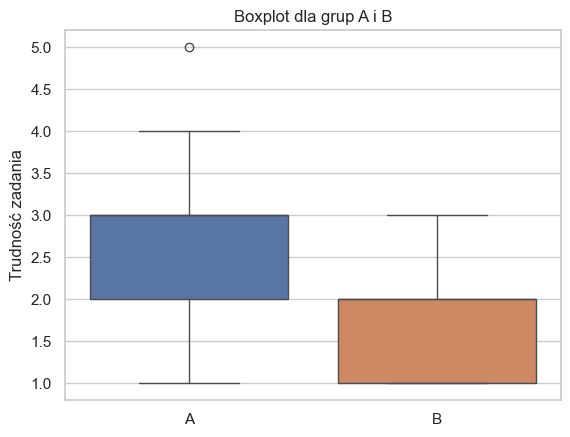

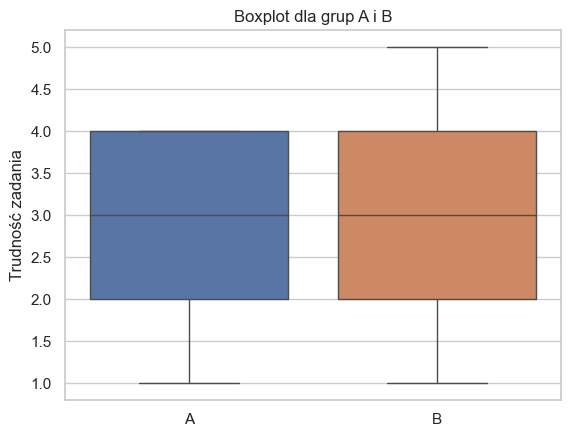

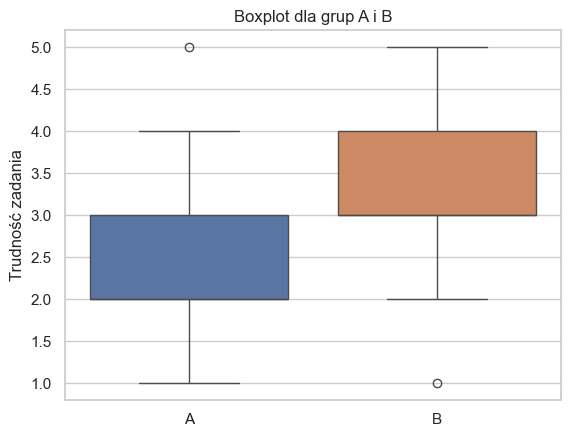

In [59]:
col = 'is_change_2'
var = True
df = df_1.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = True
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

var = False
df = df_3.copy()
plot_two_boxplots(df['diffA'][df[col] == var], df['diffB'][df[col] == var], 'A', 'B', 'Trudność zadania')

Podsumowanie:
Istotne statystycznie:
- Płeć:  grafiki 1 (mężczyźni: A trudniejsze); grafiki 3 (kobiety: B trudniejsze)
- Rok urodzenia: grafiki 3 (2003: B większy zakres, wskazanie na trudniejsze)
- Rok studiów: kolekcje (3 rok: B większy zakres, wskazanie na łatwiejsze), grafiki 2 (3 rok: A trudniejsze), grafiki 3 (1 rok: B większy zakres, wskazanie na trudniejsze)
- Kierunek studiów: grafiki 1 (geografia: A trudniejsze), grafiki 3 (geografia:  B większy zakres, wskazanie na trudniejsze)
- Specjalność: grafiki 1 (geoinfa: A trudniejsze)
- Wady wzroku: grafiki 1 (z wadami wzroku: A większy zakres, wskazanie na trudniejsze A), grafiki 2 (bez wad wzroku: wskazanie na trudniejsze A), grafiki 3 (z wadami wzroku: B trudniejsze)
- Matura polski roz: grafiki 1 (nie pisał: A trudniejsze), grafiki 2 (pisał: A większy zakres i trudniejsze), grafiki 3 (pisał: B trudniejsze; nie pisał: B większy zakres i trudniejsze)
- Matura matematyka roz: grafiki 3 (nie pisał: B trudniejsze)
- Matura historia roz: grafiki 1 (nie pisał: A trudniejsze), grafiki 3 (nie pisał: B większy zakres, trudniejsze)
- Dominujący typ uczenia: grafiki 1 (wzrokowiec: A trudniejsze), grafiki 3 (brak dominującego: B trudniejsze)
- Ilość snu: grafiki 1 (6h: A mniejszy zakres i trudniejsze)
- Samopoczucie: grafiki 1 (wysokie: A trudniejsze), grafiki 3 (wysokie: B większy zakres i B trudniejsze)
- Stres: grafiki 1 (niskie: A trudniejsze), grafiki 3 (niskie: B trudniejsze)
- Zmęczenie: grafiki 1 (Średnie: A trudniejsze), grafiki 2 (niskie: A trudniejsze), grafiki 3 (niskie: brak różnic)
- Czytanie map: grafiki 1 (wysoki: A większy zakres i trudniejsze), grafiki 3 (wysoki: B większy zakres i trudniejsze)
- Podzielność uwagi: grafiki 1 (wysoki: A trudniejsze), grafiki 3 (średni: A zdecydowanie większy zakres, minimalnie B trudniejsze)
- Analityczne myślenie: grafiki 1 (wysoki: A trudniejsze), grafiki 3 (średni: B trudniejsze)
- Spostrzegawczość: grafiki 1 (wysoki: A trudniejsze), grafiki 3 (wysoki: B trudniejsze)
- Czytanie ze zrozumieniem: grafiki 1 (wysoki: A trudniejsze), grafiki 3 (wysoki: BA większy zakres, łatwiejsze)
- Quest1-before: grafiki 1 (B: A trudniejsze), grafiki 3 (B: B większy zakres i trudniejsze)
- Quest1-after: grafiki 1 (B: A trudniejsze), grafiki 3 (B: brak widocznych różnic, A: zdecydowanie B trudniejsze, A większy zakres)
- Quest2-before: grafiki 1 (wykres: A trudniejsze, tabela: A większy zakres i trudniejsze), grafiki 3 (mapa: B większy zakres i trudniejsze)
- Quest2-after: kolekcja (wykres: B większy zakres i łatwiejsze), suma (wykres: A trudniejsze), grafiki 1 (wykres: A trudniejsze), grafiki 3 (mapa: A większy zakres, B trudniejsze)
- Quest1-zmiana: grafiki 1 (nie zmienił zdania: A trudniejsze), grafiki 3 (zmienił zdanie: B trudniejsze, nie zmienił:  brak widocznych różnic)
- Quest2-zmiana: grafiki 1 (zmienił zdania: A trudniejsze), grafiki 3 (zmienił zdanie: brak widocznych różnic, nie zmienił:  B trudniejsze)

In [60]:
import csv
with open('./results/diff_cechy_osobowe_popr.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    row = []
    for item in results:
        if item != '\n':
            row.append(item)
        else:
            writer.writerow(row)
            row = []
    if row:  # Sprawdzamy, czy jest coś do zapisania w ostatnim wierszu
        writer.writerow(row)